In [1]:
#MODULE NAME
import os
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import skimage.exposure as exposure
import pandas as pd
import numpy as np
import subprocess
import snappy
import imageio
import rasterio as rio
import rasterstats as rs
import rasterio.plot
from glob import iglob
import geopandas as gpd
#from pyspatialml import Raster
import seaborn as sns
from rasterio.plot import show
get_ipython().run_line_magic('matplotlib', 'inline')
from osgeo import gdal

In [2]:
import prosail
from prosail import spectral_lib
import numpy.matlib

In [3]:
[N, chloro, caroten, brown, EWT, LMA, LAI, hot_spot, solar_zenith, solar_azimuth, view_zenith, view_azimuth, LIDF]=[1.5,40,8,0.0,0.01,0.009,3,0.01,30,180,10,180,(-0.35,-0.15)]
#import pyPro4SAIL
#wl,rho=pyPro4SAIL.run(N, chloro, caroten, brown, EWT, LMA, LAI, hot_spot, solar_zenith, solar_azimuth, view_zenith, view_azimuth, LIDF, skyl=0.2, soilType=pyPro4SAIL.DEFAULT_SOIL)


# PROSPECT-5 or PROSPECT-D versions 

In [4]:
lam, rho, tau = prosail.run_prospect(N, chloro, caroten, brown, EWT, LMA, ant=8.0)
#lam, rho, tau = prosail.run_prospect(n, cab, car, cbrown, cw, cm, ant=8.0)

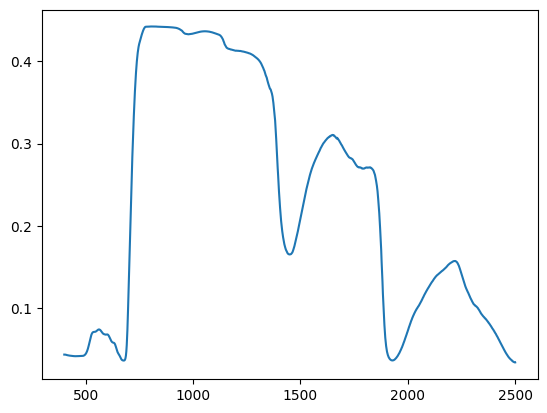

In [5]:
plt.plot(lam, rho)

# PROSPECT-5...

In [8]:
lam, rho, tau = prosail.run_prospect(N, chloro, caroten, brown, EWT, LMA, prospect_version='5')

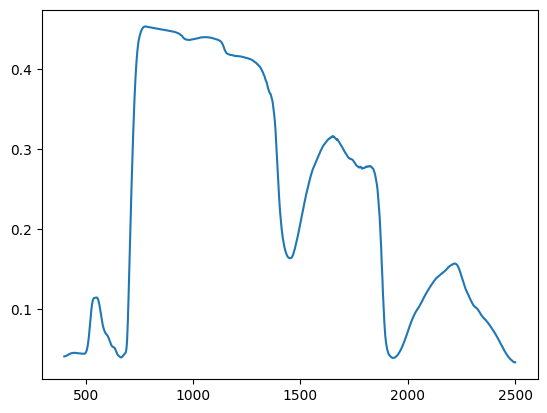

In [9]:
plt.plot(lam, rho)

# prosail

In [10]:
n = 1.2 #number of observation 
car = 10 # carotenoid content of the canopy (in SPAD)
cbrown = 0.01 #Brown pigment content of the canopy (in g/cm^2)
cw = 0.015 # Equivalent water thickness of the canopy (in cm)
cm = 0.009 # Dry matter content of the canopy (in g/cm^2)
lidfa = 45 # leaf angle distribution parameter (in degrees)
hspot = 0.01 # Hotspot parameter (in cm)
tts = 30 # solar zenith angle (in degrees)
lai= 6
cab =50
tto = 10 # sensor zenith angle (in degrees)
psi = 0 # Azimuth angle - difference between sun and sensor (in degrees)
ant = 0 #Antenna effect (in percent)
alpha = 40.0 # weighting factor for the PRI (photochemical reflectance index)
prospect_version = '5' #prospect version
typelidf = 2 # leaf type index 
lidfb = 0.0 #leaf angle distribution parameter for background (in degrees)
factor = 'DHR' # soil factor 
rsoil0 = None # initial value for the soil reflectance
rsoil = 1 # soil reflectance 
psoil = 1 #soil reflectance at the red edge position 
soil_spectrum1 = None # first soil spectrum
soil_spectrum2 = None #second soil spectrum 

In [11]:
rho_canopy2 = prosail.run_prosail(n, cab, car, cbrown, cw, cm, lai, lidfa, hspot, tts, tto, psi, 
                    ant=ant, alpha=alpha, prospect_version=prospect_version, typelidf=typelidf, lidfb=lidfb, 
                    factor=factor, rsoil0=rsoil0, rsoil=rsoil, psoil=psoil, 
                    soil_spectrum1=soil_spectrum1, soil_spectrum2=soil_spectrum2)


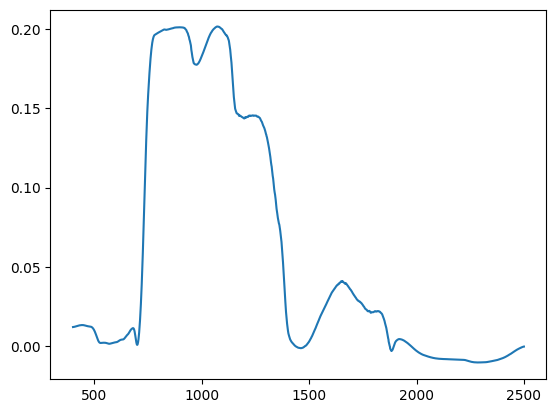

In [12]:
plt.plot(range(400, 2500+1), rho_canopy2) 

In [13]:
wl = range(400, 2500+1)

In [14]:
df = pd.DataFrame(rho_canopy2.reshape(-1, 2101), columns=list(wl))

In [15]:
df

,400,401,402,403,404,405,406,407,408,409,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.011996,0.012011,0.012022,0.01204,0.012068,0.012095,0.012125,0.012159,0.0122,0.012237,...,-0.000714,-0.00064,-0.0006,-0.000539,-0.000514,-0.000493,-0.000426,-0.000407,-0.000337,-0.000328


# Multiple spectral Prosail

In [16]:
n = 1.2 #number of observation 
car = 10 # carotenoid content of the canopy (in SPAD)
cbrown = 0.01 #Brown pigment content of the canopy (in g/cm^2)
cw = 0.015 # Equivalent water thickness of the canopy (in cm)
cm = 0.009 # Dry matter content of the canopy (in g/cm^2)
lidfa = 45 # leaf angle distribution parameter (in degrees)
hspot = 0.01 # Hotspot parameter (in cm)
tts = 30 # solar zenith angle (in degrees)
tto = 10 # sensor zenith angle (in degrees)
psi = 0 # Azimuth angle - difference between sun and sensor (in degrees)
ant = 0 #Antenna effect (in percent)
alpha = 40.0 # weighting factor for the PRI (photochemical reflectance index)
prospect_version = '5' #prospect version
typelidf = 2 # leaf type index 
lidfb = 0.0 #leaf angle distribution parameter for background (in degrees)
factor = 'DHR' # soil factor 
rsoil0 = None # initial value for the soil reflectance
rsoil = 1 # soil reflectance 
psoil = 1 #soil reflectance at the red edge position 
soil_spectrum1 = None # first soil spectrum
soil_spectrum2 = None #second soil spectrum 
  

rho_canopy_list = [] #list to store the spectral rho_canopy values
lai_range = [x/10 for x in np.arange(0, 10, 0.5)] #range of LAI values (from 0 to 10 with increaments of 0.5)
cab_range = np.arange(10, 50, 5) #range of cab values (from 10 to 50 with increaments of 5)
    
for lai in lai_range:
    for cab in cab_range:
        rho_canopy = prosail.run_prosail(n, cab, car, cbrown, cw, cm, lai, lidfa, hspot, tts, tto, psi, \
                                        ant=ant, alpha=alpha, prospect_version=prospect_version, typelidf=typelidf, lidfb=lidfb, \
                                        factor=factor, rsoil0=rsoil0, rsoil=rsoil, psoil=psoil, \
                                        soil_spectrum1=soil_spectrum1, soil_spectrum2=soil_spectrum2)
        rho_canopy_list.append(rho_canopy)
         


In [18]:
#rho_canopy_list

In [19]:
wl = range(400, 2500+1)

In [20]:
df = pd.DataFrame(rho_canopy_list, columns=list(wl))

In [21]:
df

,400,401,402,403,404,405,406,407,408,409,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.237700,0.237300,0.236900,0.236500,0.236000,0.235600,0.235200,0.234800,0.234400,0.234000,...,0.448200,0.448200,0.448200,0.44820,0.448200,0.44780,0.447500,0.447100,0.446700,0.446400
1,0.237700,0.237300,0.236900,0.236500,0.236000,0.235600,0.235200,0.234800,0.234400,0.234000,...,0.448200,0.448200,0.448200,0.44820,0.448200,0.44780,0.447500,0.447100,0.446700,0.446400
2,0.237700,0.237300,0.236900,0.236500,0.236000,0.235600,0.235200,0.234800,0.234400,0.234000,...,0.448200,0.448200,0.448200,0.44820,0.448200,0.44780,0.447500,0.447100,0.446700,0.446400
3,0.237700,0.237300,0.236900,0.236500,0.236000,0.235600,0.235200,0.234800,0.234400,0.234000,...,0.448200,0.448200,0.448200,0.44820,0.448200,0.44780,0.447500,0.447100,0.446700,0.446400
4,0.237700,0.237300,0.236900,0.236500,0.236000,0.235600,0.235200,0.234800,0.234400,0.234000,...,0.448200,0.448200,0.448200,0.44820,0.448200,0.44780,0.447500,0.447100,0.446700,0.446400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.089028,0.088898,0.088765,0.088638,0.088484,0.088364,0.088247,0.088132,0.088023,0.087911,...,0.158237,0.158195,0.158172,0.15814,0.158127,0.15798,0.157837,0.157691,0.157511,0.157407
156,0.089031,0.088902,0.088769,0.088642,0.088489,0.088370,0.088253,0.088139,0.088031,0.087919,...,0.158237,0.158195,0.158172,0.15814,0.158127,0.15798,0.157837,0.157691,0.157511,0.157407
157,0.089034,0.088904,0.088773,0.088646,0.088493,0.088374,0.088258,0.088145,0.088036,0.087925,...,0.158237,0.158195,0.158172,0.15814,0.158127,0.15798,0.157837,0.157691,0.157511,0.157407
158,0.089036,0.088907,0.088775,0.088649,0.088496,0.088378,0.088262,0.088149,0.088041,0.087930,...,0.158237,0.158195,0.158172,0.15814,0.158127,0.15798,0.157837,0.157691,0.157511,0.157407


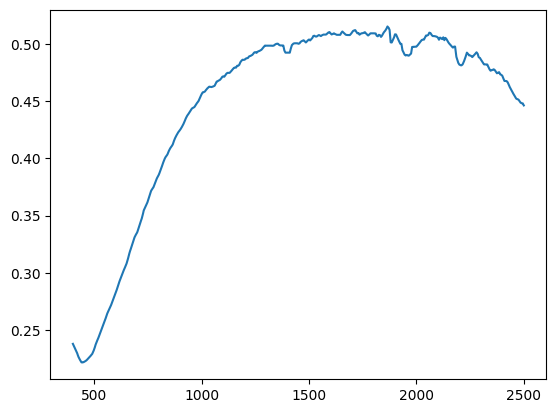

In [22]:
plt.plot(np.arange(400,2501,1), np.array(df.iloc[1]))
#plt.plot(np.array(df.iloc[1]), np.arange(400,2501, 1))

# EXAMPLE FOR PROSAIL

In [23]:
rr = prosail.run_prosail(n, 40, 8.0, 0.0, 0.01, 0.009, 3.0, -0.35, 0.01,
                        30.0, 10.0, 0.0, typelidf=1, lidfb=-0.15, 
                        rsoil = 1., psoil=1., factor="DHR")

In [24]:
 x = np.arange(400, 2501 )

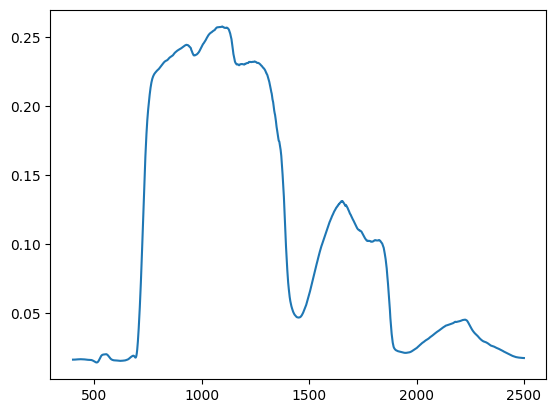

In [25]:
plt.plot(x, rr) 

In [26]:
df = pd.DataFrame(rr.reshape(-1, 2101), columns=list(wl))
df

,400,401,402,403,404,405,406,407,408,409,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.016321,0.016317,0.016311,0.01631,0.016312,0.016317,0.016324,0.016333,0.016348,0.01636,...,0.017551,0.017547,0.017546,0.017545,0.017545,0.017533,0.017518,0.017507,0.017488,0.017482


df

In [195]:
#plt.plot(np.arange(400,2501,1), np.array(df.iloc[0]))